In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [303]:
df = pd.read_csv("heart.csv")

In [305]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: xlabel='sex'>

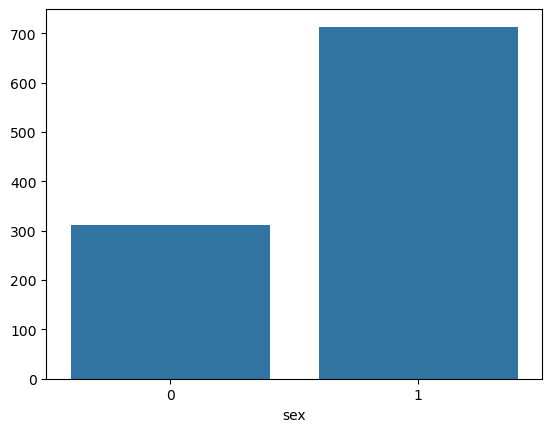

*********age***********
Min of age is 29
Max of age is 77
Mean of age is 54.43414634146342
Std of age is 9.072290233244281


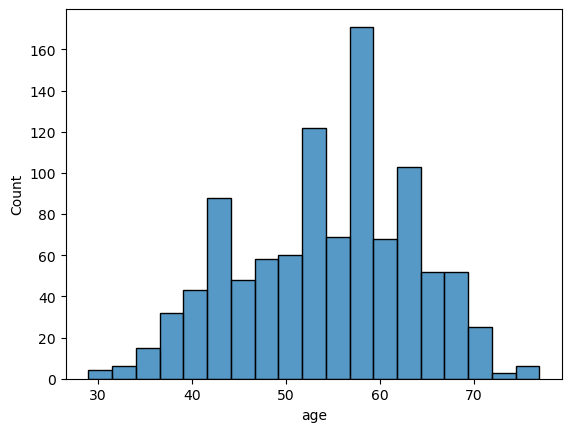

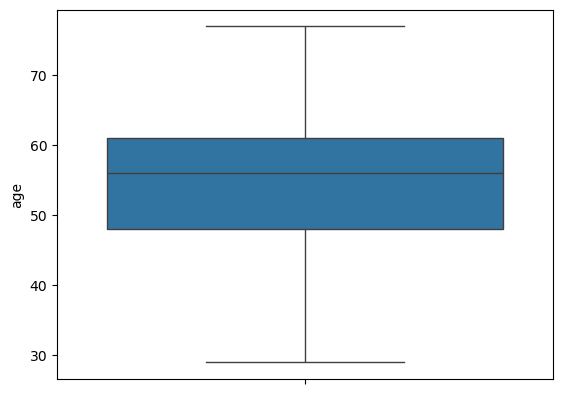

****************************************************************************************************************************************************************************************************************************
*********sex***********
Unique values,[1 0]
Unique values,2
Unique values,sex
1    713
0    312
Name: count, dtype: int64


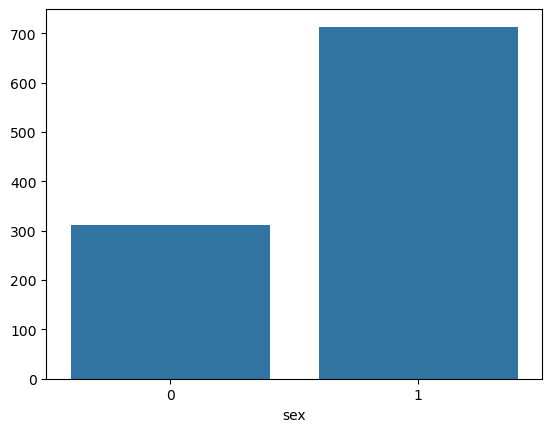

*********cp***********
Unique values,[0 1 2 3]
Unique values,4
Unique values,cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


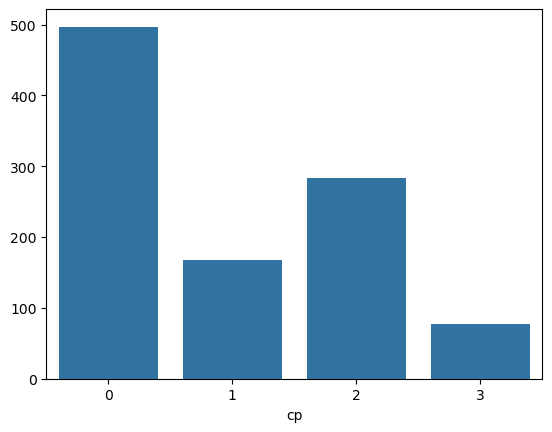

*********trestbps***********
Min of trestbps is 94
Max of trestbps is 200
Mean of trestbps is 131.61170731707318
Std of trestbps is 17.516718005376408


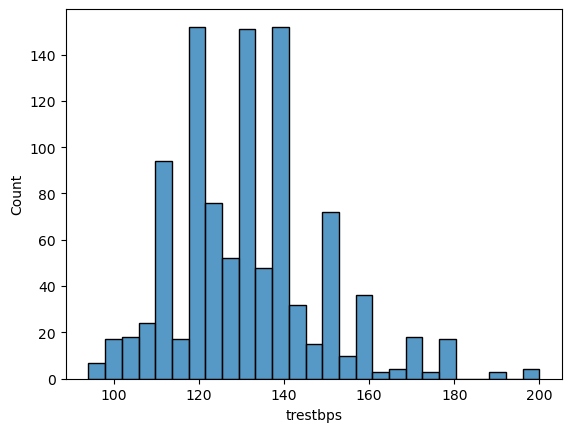

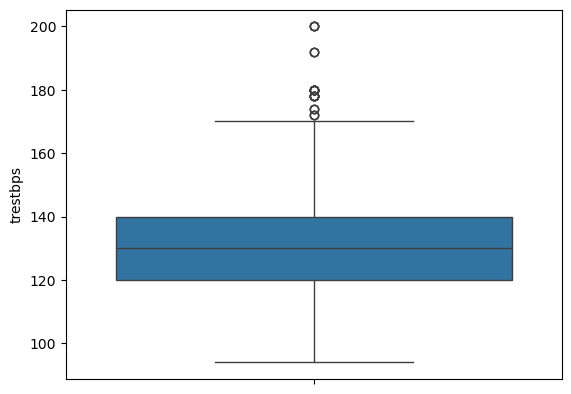

****************************************************************************************************************************************************************************************************************************
*********chol***********
Min of chol is 126
Max of chol is 564
Mean of chol is 246.0
Std of chol is 51.59251020618206


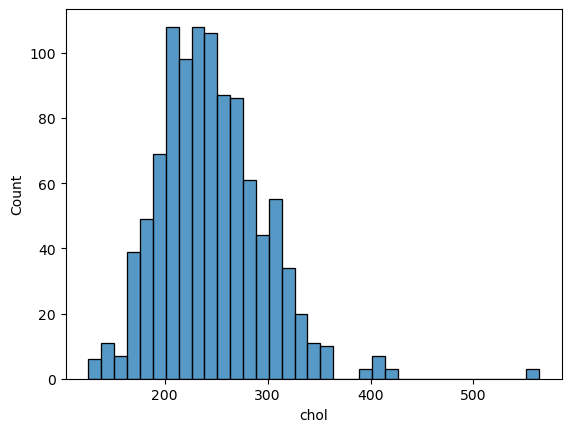

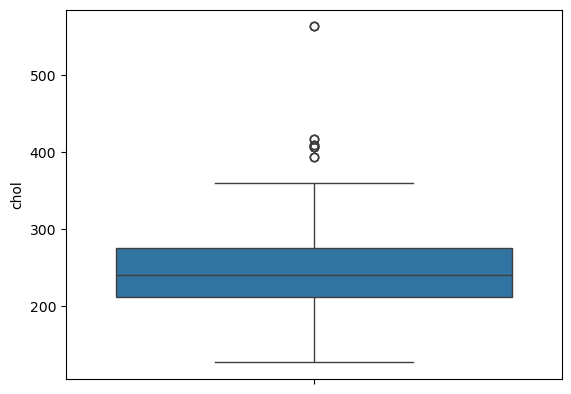

****************************************************************************************************************************************************************************************************************************
*********fbs***********
Unique values,[0 1]
Unique values,2
Unique values,fbs
0    872
1    153
Name: count, dtype: int64


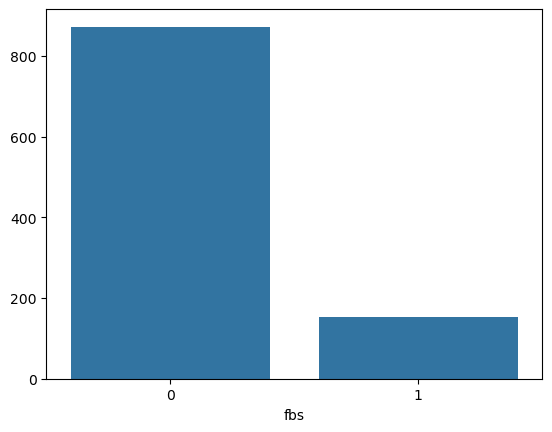

*********restecg***********
Unique values,[1 0 2]
Unique values,3
Unique values,restecg
1    513
0    497
2     15
Name: count, dtype: int64


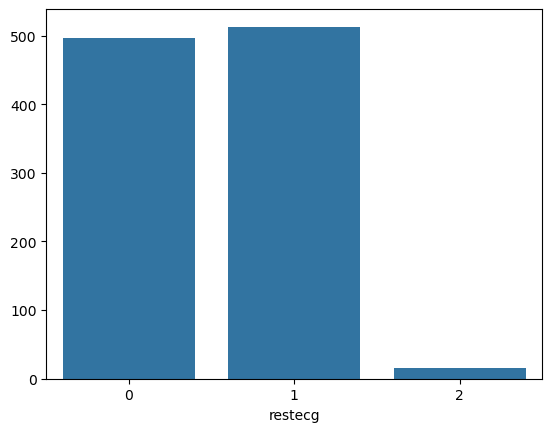

*********thalach***********
Min of thalach is 71
Max of thalach is 202
Mean of thalach is 149.11414634146342
Std of thalach is 23.005723745977196


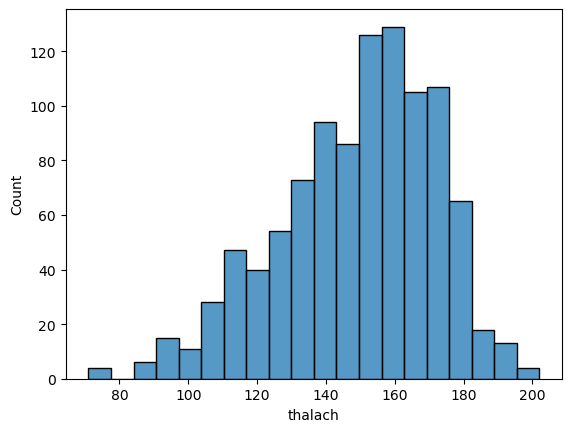

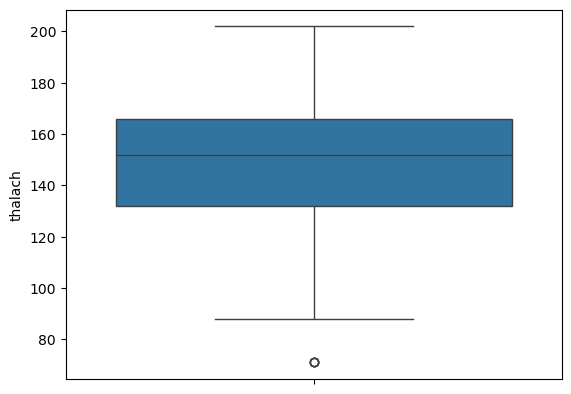

****************************************************************************************************************************************************************************************************************************
*********exang***********
Unique values,[0 1]
Unique values,2
Unique values,exang
0    680
1    345
Name: count, dtype: int64


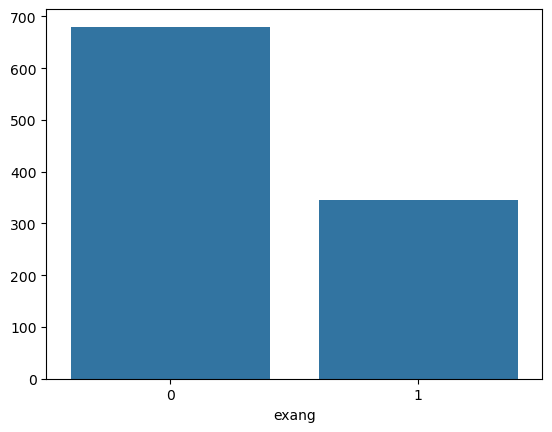

*********oldpeak***********
Min of oldpeak is 0.0
Max of oldpeak is 6.2
Mean of oldpeak is 1.0715121951219515
Std of oldpeak is 1.175053255150173


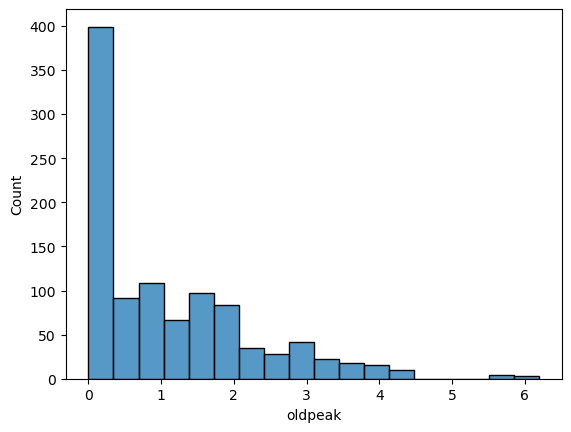

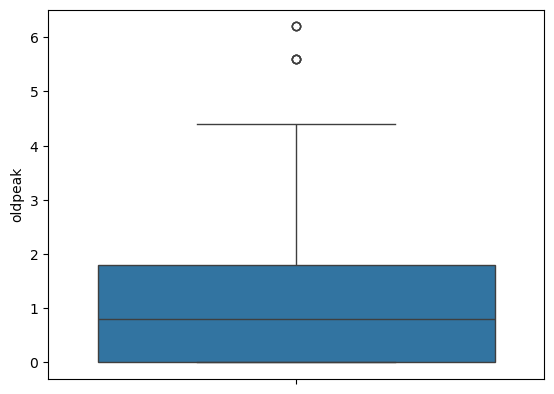

****************************************************************************************************************************************************************************************************************************
*********slope***********
Unique values,[2 0 1]
Unique values,3
Unique values,slope
1    482
2    469
0     74
Name: count, dtype: int64


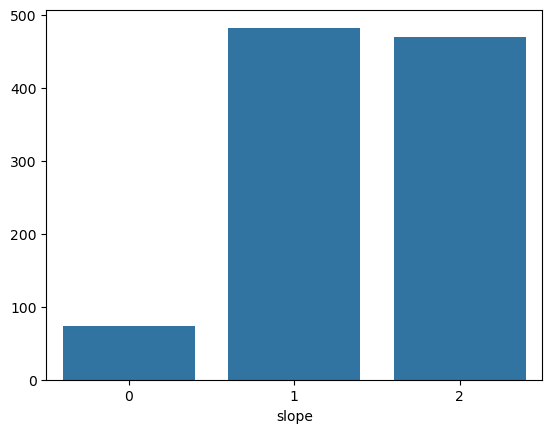

*********ca***********
Unique values,[2 0 1 3 4]
Unique values,5
Unique values,ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


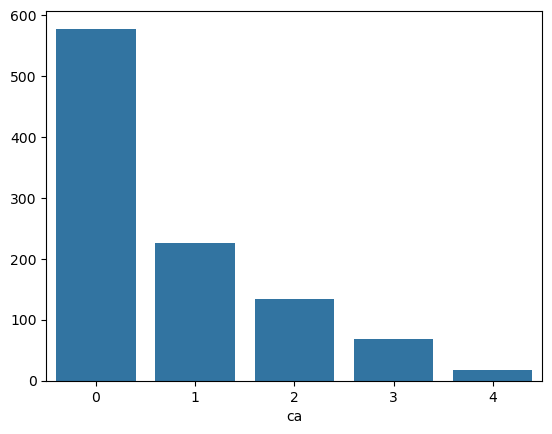

*********thal***********
Unique values,[3 2 1 0]
Unique values,4
Unique values,thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


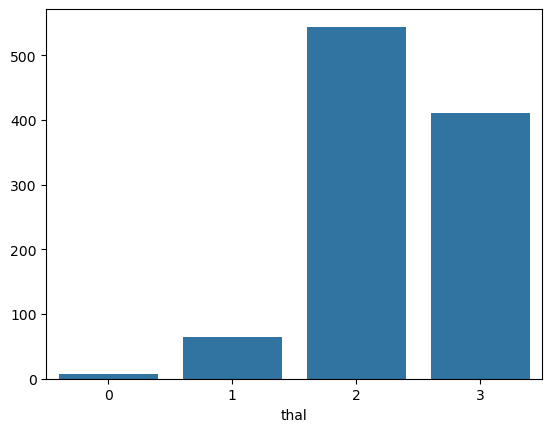

*********target***********
Unique values,[0 1]
Unique values,2
Unique values,target
1    526
0    499
Name: count, dtype: int64


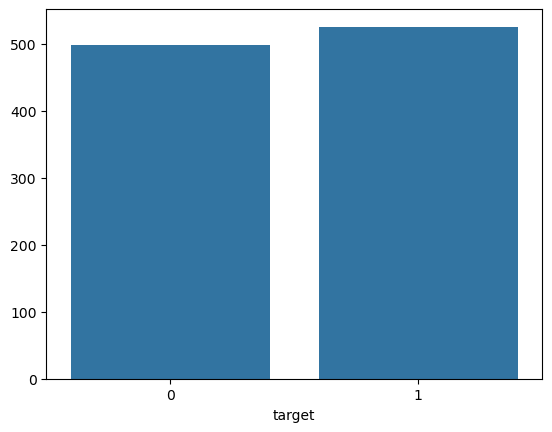

In [45]:
for i in df.columns:
    print(f"*********{i}***********")
    if df[i].nunique()> 5:
        print(f"Min of {i} is {df[i].min()}")
        print(f"Max of {i} is {df[i].max()}")
        print(f"Mean of {i} is {df[i].mean()}")
        print(f"Std of {i} is {df[i].std()}")
        sns.histplot(df[i])
        plt.show()
        sns.boxplot(df[i])
        plt.show()
        print("***********"*20)
    else:
        print(f"Unique values,{df[i].unique()}")
        print(f"Unique values,{df[i].nunique()}")
        print(f"Unique values,{df[i].value_counts()}")
        sns.barplot(x = df[i].value_counts().index,y = df[i].value_counts().values)
        plt.show()

In [39]:
print(df["sex"].unique())

[1 0]


In [307]:
df

X = df.drop("target",axis = 1)
y = df["target"]

In [55]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [309]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 13,stratify=y)

In [311]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
93,44,1,0,120,169,0,1,144,1,2.8,0,0,1
351,50,1,0,144,200,0,0,126,1,0.9,1,0,3
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2
834,42,1,0,136,315,0,1,125,1,1.8,1,0,1
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,43,0,2,122,213,0,1,165,0,0.2,1,0,2
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1
537,52,1,1,120,325,0,1,172,0,0.2,2,0,2
321,48,0,2,130,275,0,1,139,0,0.2,2,0,2


In [61]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
941,52,0,2,136,196,0,0,169,0,0.1,1,0,2
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2
438,47,1,2,130,253,0,1,179,0,0.0,2,0,2
467,47,1,0,110,275,0,0,118,1,1.0,1,1,2
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,70,1,2,160,269,0,1,112,1,2.9,1,1,3
651,41,1,1,120,157,0,1,182,0,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
716,55,0,0,128,205,0,2,130,1,2.0,1,1,3


In [63]:
y_train

93     0
351    0
572    1
834    0
79     1
      ..
877    1
345    0
537    1
321    1
248    1
Name: target, Length: 820, dtype: int64

In [65]:
sc = StandardScaler()

In [69]:
X_train_transformed = sc.fit_transform(X_train)

In [71]:
y_train

93     0
351    0
572    1
834    0
79     1
      ..
877    1
345    0
537    1
321    1
248    1
Name: target, Length: 820, dtype: int64

In [73]:
Lr = LogisticRegression(penalty='l2',
    dual=False,
    C=1.0,
    solver='lbfgs')

In [77]:
Model = Lr.fit(X_train_transformed,y_train)

In [99]:
Model.score(X_train_transformed,y_train)

0.8634146341463415

In [79]:
Model

LogisticRegression()

In [81]:
#Evaluation
X_test_transformed = sc.transform(X_test)

In [85]:
y_pred = Model.predict(X_test_transformed)

In [93]:
accuracy_score(y_test,y_pred)

0.8536585365853658

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       100
           1       0.84      0.88      0.86       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [313]:
#Fixing Assumptions 
from sklearn.preprocessing import PolynomialFeatures

In [149]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [315]:
X = X.drop(["chol","thalach","trestbps"],axis = 1)

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Feature        VIF
0      age  17.963273
1      sex   3.448906
2       cp   2.221294
3      fbs   1.250479
4  restecg   2.005625
5    exang   2.004367
6  oldpeak   2.996496
7    slope   7.646923
8       ca   1.776020
9     thal  14.507859


In [319]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 13,stratify=y)

In [321]:
pf = PolynomialFeatures(degree = 2)

In [323]:
x_train_pf =  pf.fit_transform(X_train)

In [261]:
#df_pf = pd.DataFrame(x_train_pf,columns = pf.get_feature_names_out())

In [327]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = df_pf.columns
# vif_data["VIF"] = [variance_inflation_factor(df_pf.values, i) for i in range(df_pf.shape[1])]

# dr = list(vif_data[vif_data["VIF"] >15]["Feature"].values)

In [325]:
#df_pf

In [329]:
#dr

In [331]:
#df_pf.drop(dr,axis = 1,inplace = True)

In [333]:
Sc1 = StandardScaler()
X_train_pf_transformed = Sc1.fit_transform(x_train_pf)

In [401]:
Lr1 = LogisticRegression(C = 206.913808111479, max_iter =  100, penalty= 'l1', solver= 'liblinear')

In [403]:
Model = Lr1.fit(X_train_pf_transformed,y_train)

In [404]:
Model

LogisticRegression(C=206.913808111479, penalty='l1', solver='liblinear')

In [405]:
Model.score(X_train_pf_transformed,y_train)

0.9524390243902439

In [409]:
# x_test_pf =  pd.DataFrame(pf.transform(X_test),columns = pf.get_feature_names_out())
# x_test_pf = x_test_pf.drop(dr,axis = 1)
x_test_pf = pf.transform(X_test)
X_test_pf_transformed = Sc1.transform(x_test_pf)

In [411]:
y_pred = Model.predict(X_test_pf_transformed)

In [413]:
accuracy_score(y_test,y_pred)

0.926829268292683

In [415]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid
param_grid = {
'penalty': ['l1', 'l2'],
'C': np.logspace(-4, 4, 20),
'solver': [ 'liblinear', 'saga'],
'max_iter': [100, 200,300]
}

# Initialize Logistic Regression model
log_model = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_pf_transformed,y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters: {'C': 206.913808111479, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [353]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])